# **Naive Bayes**

In this notebook we will look at **Naive Bayes**.

Do some imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.preprocessing import StandardScaler

from matplotlib.colors import ListedColormap
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **Let's start by trying Gaussian Naive Bayes on the Iris dataset**

First, load the data.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

Take the data with features 2 and 3.

In [3]:
X = iris.data[:, (2, 3)]
y = iris.target_names[iris.target] == 'versicolor'

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Create a model.

In [4]:
nb = GaussianNB()
nb.fit(X, y)

GaussianNB()

Plot it.

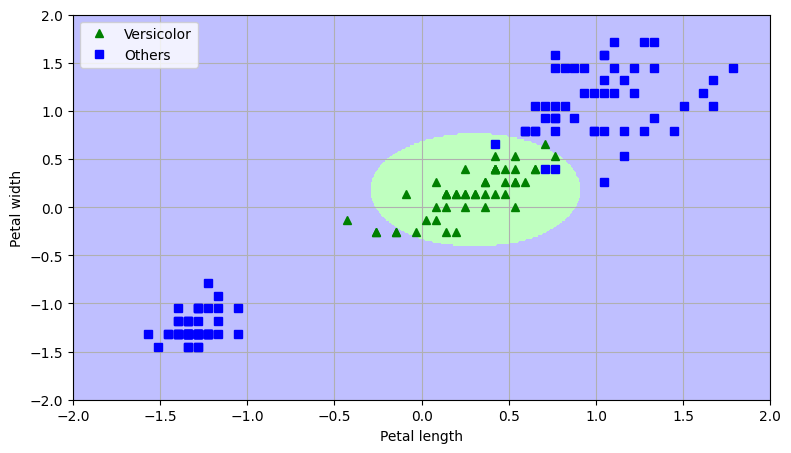

In [5]:
x0, x1 = np.meshgrid(np.linspace(-2, 2, 500).reshape(-1, 1), np.linspace(-2, 2, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

zz = nb.predict(X_new).reshape(x0.shape)

plt.figure(figsize=(9, 5))
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label="Versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Others")

custom_cmap = ListedColormap(["#bfbfff", "#bfffbf"])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

Evaluate it.

In [6]:
yHat = cross_val_predict(nb, X, y, cv=10)

In [7]:
confusion_matrix(y, yHat)

array([[97,  3],
       [ 7, 43]])

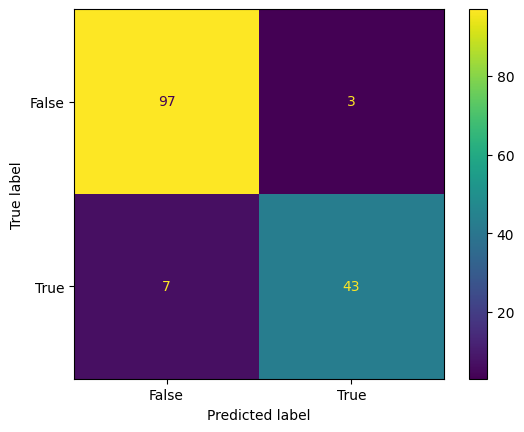

In [8]:
ConfusionMatrixDisplay.from_predictions(y, yHat)

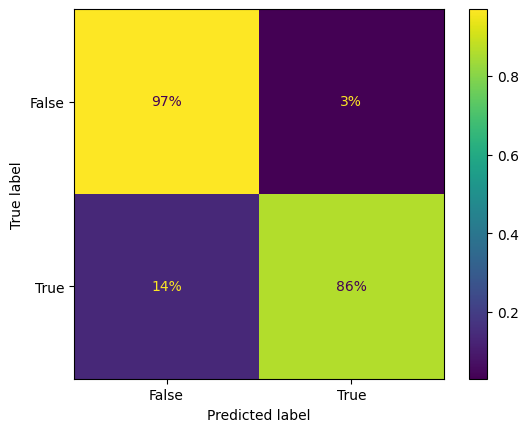

In [9]:
ConfusionMatrixDisplay.from_predictions(y, yHat, normalize="true", values_format=".0%")

In [10]:
print('Overall evaluation:')
print('Accuracy: ', accuracy_score(y, yHat))
print('Precision:', precision_score(y, yHat, average='macro'))
print('Recall:   ', recall_score(y, yHat, average='macro'))
print('F1:       ', f1_score(y, yHat, average='macro'))

Overall evaluation:
Accuracy:  0.9333333333333333
Precision: 0.9337374581939799
Recall:    0.915
F1:        0.923406862745098


# **Let's try all three classes**

We will do the same processing but with all three classes that the dataset offers.

In [11]:
X = iris.data[:, (2, 3)]
y = iris.target

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Create a model.

In [12]:
nb = GaussianNB()
nb.fit(X, y)

GaussianNB()

Plot it.

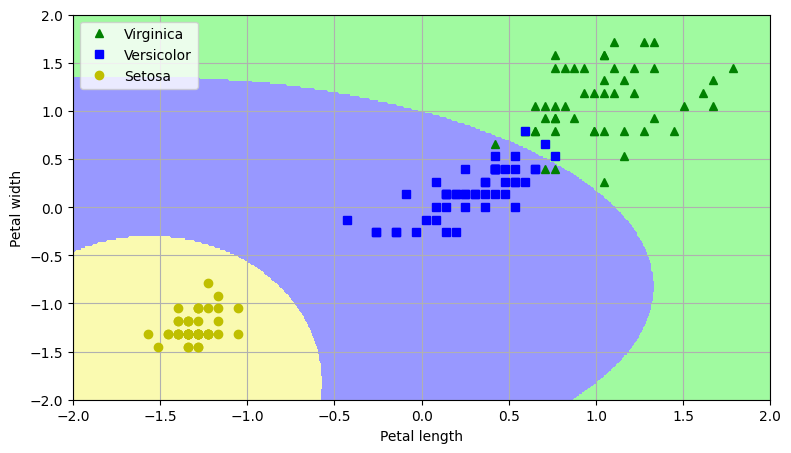

In [13]:
x0, x1 = np.meshgrid(np.linspace(-2, 2, 500).reshape(-1, 1), np.linspace(-2, 2, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

zz =  nb.predict(X_new).reshape(x0.shape)

plt.figure(figsize=(9, 5))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Setosa")

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

Evaluate it.

In [14]:
yHat = cross_val_predict(nb, X, y, cv=10)

In [15]:
confusion_matrix(y, yHat)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

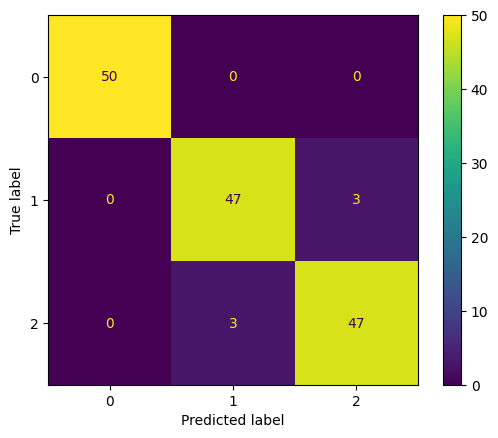

In [16]:
ConfusionMatrixDisplay.from_predictions(y, yHat)

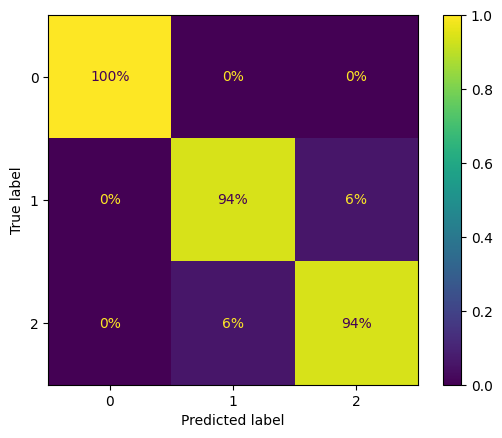

In [17]:
ConfusionMatrixDisplay.from_predictions(y, yHat, normalize="true", values_format=".0%")

In [18]:
print('Accuracy: ', accuracy_score(y, yHat))
print('Precision:', precision_score(y, yHat, average='macro'))
print('Recall:   ', recall_score(y, yHat, average='macro'))
print('F1:       ', f1_score(y, yHat, average='macro'))

Accuracy:  0.96
Precision: 0.96
Recall:    0.96
F1:        0.96


# **Now let's try Bernoulli Naive Bayes on a simplified email spam dataset**

Our dataset consists of 13 emails. Each is encoded as a vector with its elements representing presence or absence of a particular word in the text of the email. The words are as follows: `hi` `dear` `buy` `sell` `question` `project` `pill` `click`.

In [19]:
data = np.array([
    [1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 1],
    [0, 0, 1, 1, 0, 0, 0, 1, 1],
    [1, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 0],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 0, 0, 1, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 1, 1, 1],
    [1, 0, 1, 0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 1, 1]])
X = data[:, 0:8]
y = data[:, 8]

Create a model.

In [20]:
nb = BernoulliNB()
nb.fit(X, y)

BernoulliNB()

Use the model for classifying a new email with the following contents: ~~`hi`~~ `dear` ~~`buy`~~ `sell` `question` `project` ~~`pill`~~ ~~`click`~~.

In [24]:
xq = np.array([[0, 1, 0, 1, 1, 1, 0, 0]])
print(nb.predict_proba(xq))
print("Spam" if nb.predict(xq) else "Not spam")

[[0.82201377 0.17798623]]
Not spam


In [22]:
xq = np.array([[0, 1, 1, 0, 0, 0, 1, 1]])
print(nb.predict_proba(xq))
print("Spam" if nb.predict(xq) else "Not spam")

[[0.03762656 0.96237344]]
Spam


# **Let's try implementing Bernoulli Naive Bayes from scratch**

In [25]:
py = [np.mean(y == 0), np.mean(y == 1)]  # Class priors
alpha = 1  # Laplace smoothing parameter

# Guaranteeing binary data
X[X != 0] = 1

# Number of features
m = X.shape[1]

# Log probabilities for each class
log_probs = []

# Loop over the two classes (0 and 1)
for c in range(0, 2):
    pxy = np.empty(m)  # For storing the conditional probabilities for each feature

    Ny = np.sum(y == c)  # Count training examples with class being c

    # Loop over the m features
    for j in range(0, m):
        # Count how many times the feature has the same value as the query
        Nj = np.sum(X[y == c, j] == xq[0, j])
        # Compute probability with applied Laplace smoothing
        pxy[j] = (Nj + alpha) / (Ny + alpha * 2)

    # Compute log of posterior (sum of logs to avoid underflow)
    log_p = np.log(py[c]) + np.sum(np.log(pxy))
    log_probs.append(log_p)

# Convert log probabilities to probabilities (exponentiate and normalize)
probs = np.exp(log_probs)  # Exponentiate the log probabilities
probs /= np.sum(probs)  # Normalize to sum to 1 (softmax)

# Output probabilities for each class
print(f'Class 0 probability: {probs[0]}')
print(f'Class 1 probability: {probs[1]}')

# Predicted class is the one with the highest probability
predicted_class = np.argmax(probs)  # Get the index of the maximum probability
print(f'Predicted class: {predicted_class}')
print("Spam" if predicted_class else "Not spam")

Class 0 probability: 0.8220137687068818
Class 1 probability: 0.17798623129311816
Predicted class: 0
Not spam


---
*Notebook by Gints Jēkabsons*